<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  100 non-null    float64
 1   depth      100 non-null    float64
 2   latitude   100 non-null    float64
 3   longitude  100 non-null    float64
dtypes: float64(4)
memory usage: 3.3 KB
None


,magnitude,depth,latitude,longitude
0,4.020436,220.036630,-80.436522,11.612803
1,7.076727,90.455003,72.129876,87.938529
2,2.978995,671.284910,1.936526,-79.819370
3,3.539362,33.593694,-22.244851,-155.983912
4,6.039417,481.018444,-37.837875,25.960848


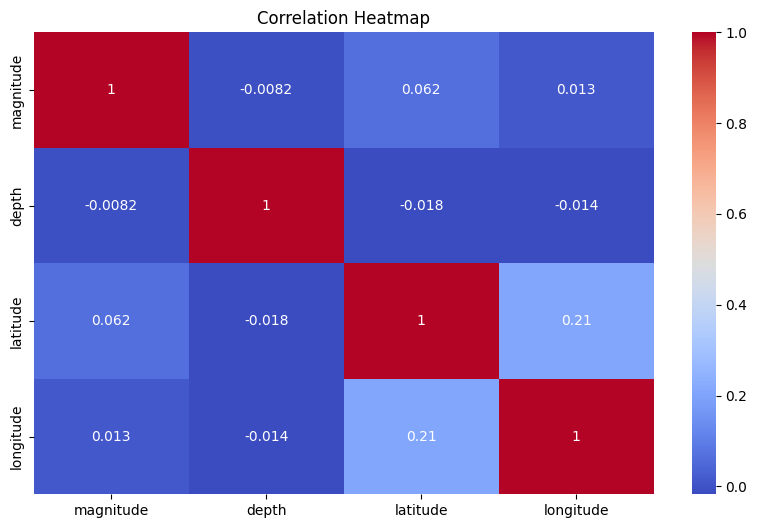

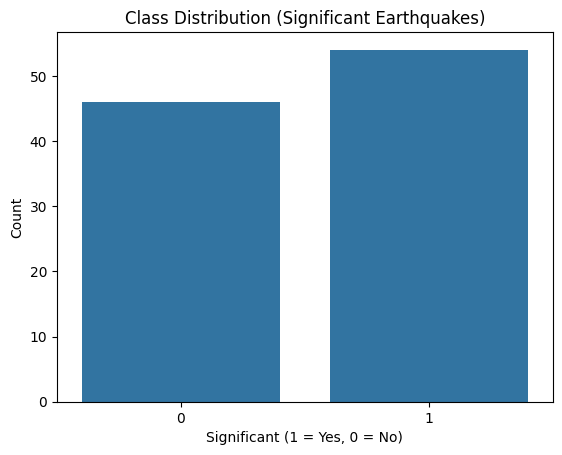

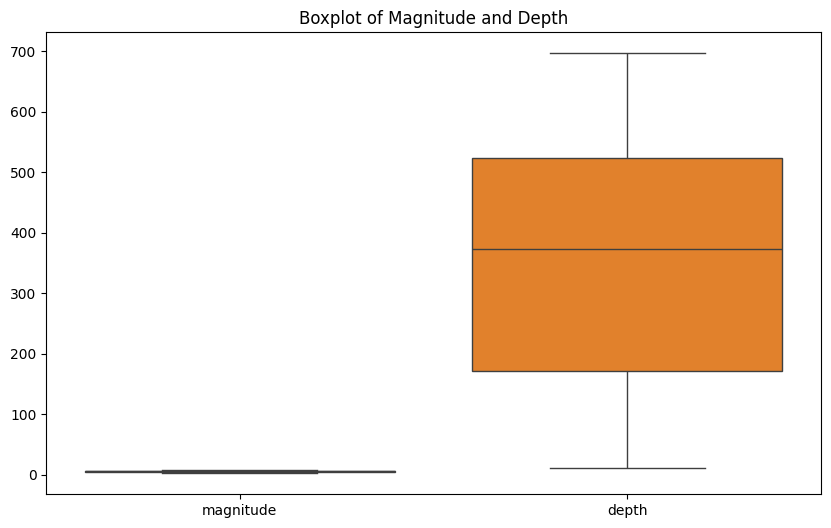

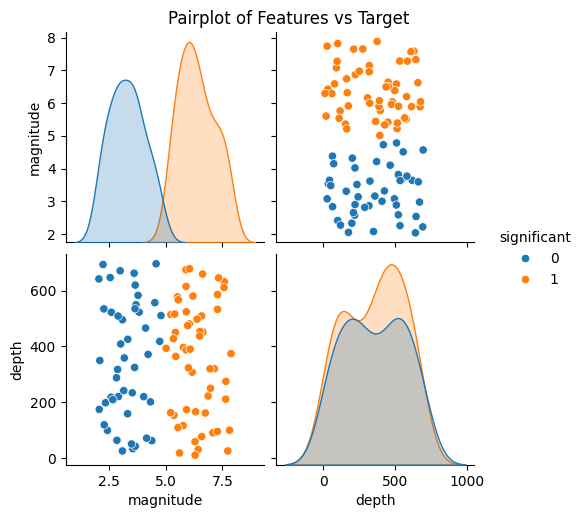

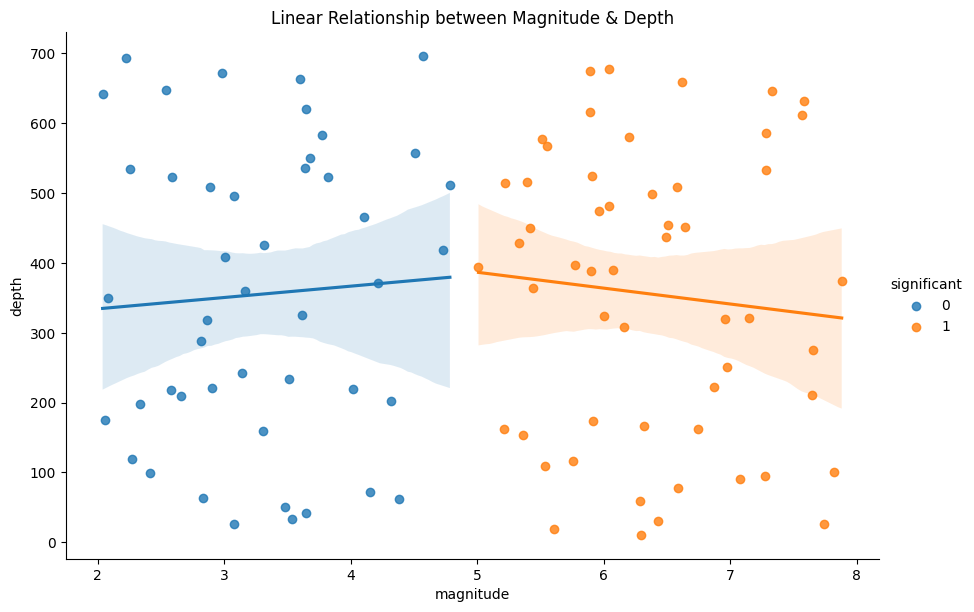

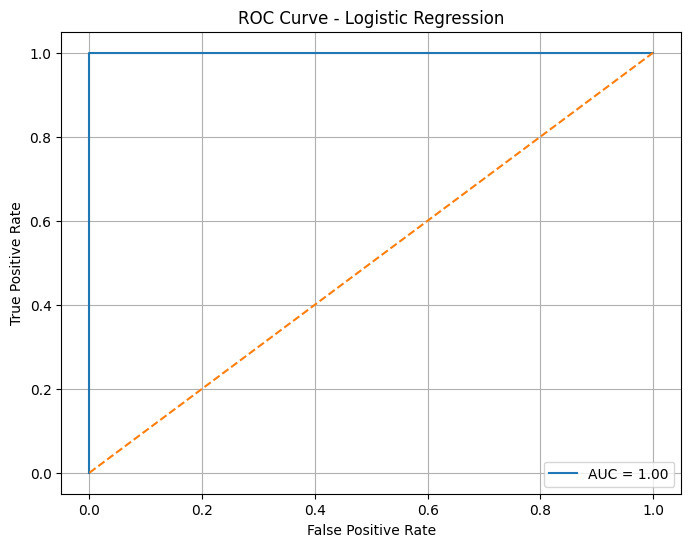

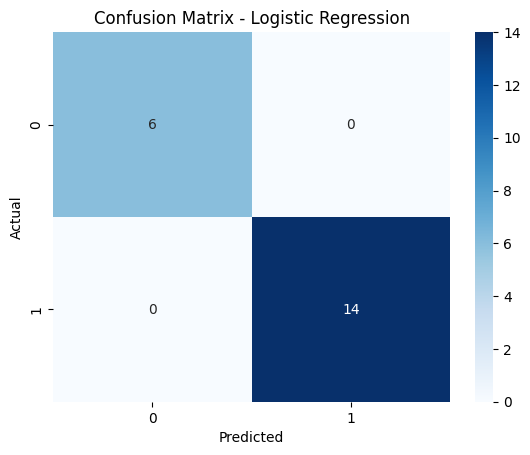

📋 Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



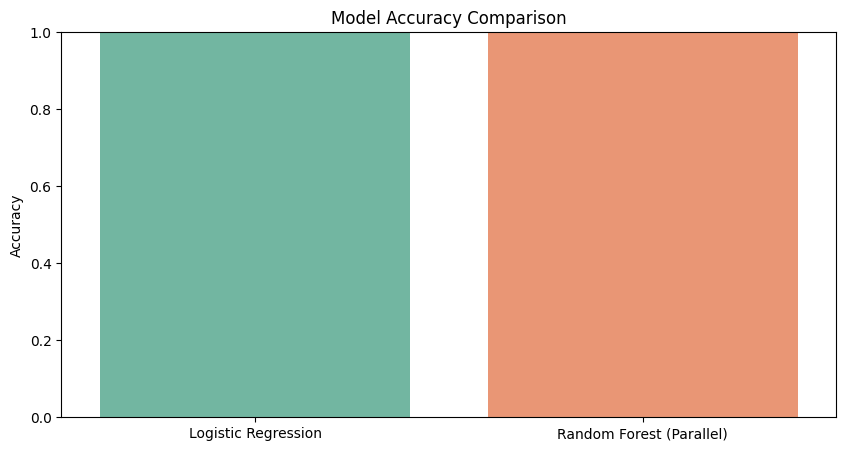

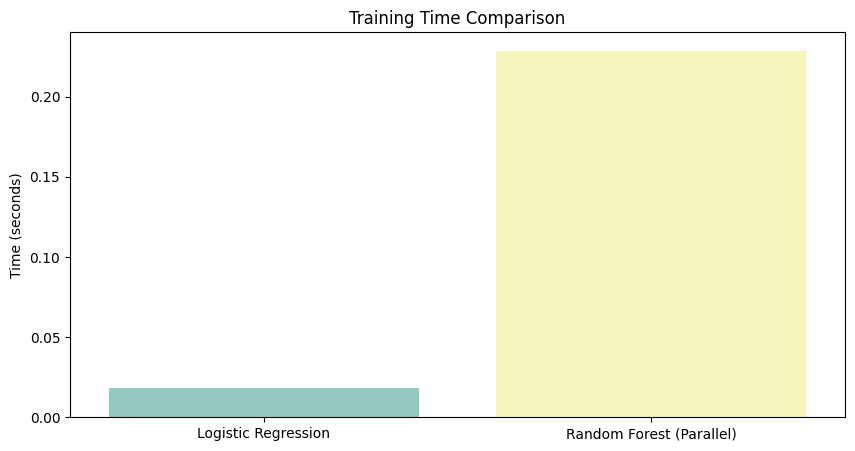

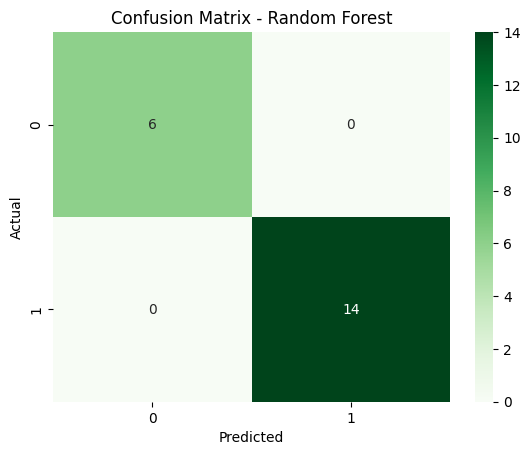

📋 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



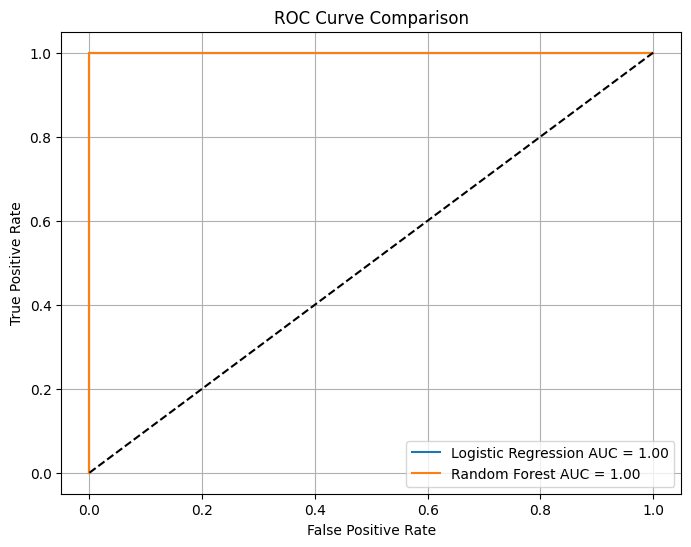

In [ ]:
# ✅ Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

# Create a dummy earthquake.csv file for demonstration
data = {'magnitude': np.random.uniform(2, 8, 100),
        'depth': np.random.uniform(0, 700, 100),
        'latitude': np.random.uniform(-90, 90, 100),
        'longitude': np.random.uniform(-180, 180, 100)}
df = pd.DataFrame(data)
df.to_csv('earthquake.csv', index=False)

# ✅ Load dataset
df = pd.read_csv('earthquake.csv')
print(df.info())
display(df.head())

# ✅ Correlation Heatmap
plt.figure(figsize=(10, 6))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# ✅ Add binary classification target
df['significant'] = (df['magnitude'] >= 5).astype(int)

# ✅ Class Distribution Plot
sns.countplot(data=df, x='significant')
plt.title('Class Distribution (Significant Earthquakes)')
plt.xlabel('Significant (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# ✅ Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['magnitude', 'depth']])
plt.title('Boxplot of Magnitude and Depth')
plt.show()

# ✅ Pairplot
sns.pairplot(df[['magnitude', 'depth', 'significant']], hue='significant')
plt.suptitle('Pairplot of Features vs Target', y=1.02)
plt.show()

# ✅ Feature & Target Split
X = df[['magnitude', 'depth']]
y = df['significant']

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Logistic Regression Training
start = time.time()
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_time = time.time() - start

# ✅ Linear Relationship Plot
sns.lmplot(data=df, x='magnitude', y='depth', hue='significant', height=6, aspect=1.5)
plt.title("Linear Relationship between Magnitude & Depth")
plt.show()

# ✅ ROC Curve - Logistic Regression
y_proba = log_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()

# ✅ Confusion Matrix - Logistic Regression
y_pred = log_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ✅ Classification Report
print("📋 Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred))

# ✅ Random Forest with Parallel Processing
start = time.time()
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)  # 🔁 Parallel Model
rf_model.fit(X_train_scaled, y_train)
rf_time = time.time() - start

# ✅ Accuracy Scores
log_acc = log_model.score(X_test_scaled, y_test)
rf_acc = rf_model.score(X_test_scaled, y_test)

# ✅ Accuracy Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=['Logistic Regression', 'Random Forest (Parallel)'], y=[log_acc, rf_acc], palette='Set2')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# ✅ Training Time Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=['Logistic Regression', 'Random Forest (Parallel)'], y=[log_time, rf_time], palette='Set3')
plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')
plt.show()

# ✅ Confusion Matrix - Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ✅ Classification Report - Random Forest
print("📋 Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# ✅ ROC Curve - Random Forest
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot Both ROC Curves
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression AUC = {roc_auc:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()